# Reading points from a file and produce a graph

Let's inspect the input file, which is in the appropriate format for filling a TGraphErrors

In [1]:
.! cat macro2_input.txt

# Measurement of Friday 26 March
# Experiment 2 Physics Lab

1   5   2
2   11  2
3   17  3
4   22  4
5   28  4
6   35  4
7   40  4
8   45  4
9   50  4
10  60  5


Now, let's start with the creation of the graphs as well as making it look presentable 

In [2]:
TGraphErrors graph_expected("./macro2_input.txt","%lg %lg %lg");
graph_expected.SetTitle("Measurement XYZ and Expectation;lenght [cm];Arb.Units");
graph_expected.SetFillColor(kYellow);
graph_expected.Print("all");

x[0]=1, y[0]=5, ex[0]=0, ey[0]=2
x[1]=2, y[1]=11, ex[1]=0, ey[1]=2
x[2]=3, y[2]=17, ex[2]=0, ey[2]=3
x[3]=4, y[3]=22, ex[3]=0, ey[3]=4
x[4]=5, y[4]=28, ex[4]=0, ey[4]=4
x[5]=6, y[5]=35, ex[5]=0, ey[5]=4
x[6]=7, y[6]=40, ex[6]=0, ey[6]=4
x[7]=8, y[7]=45, ex[7]=0, ey[7]=4
x[8]=9, y[8]=50, ex[8]=0, ey[8]=4
x[9]=10, y[9]=60, ex[9]=0, ey[9]=5


In [3]:
TFile * fin = TFile::Open("outputfromMacro1.root");
fin->ls();

TFile**		outputfromMacro1.root	
 TFile*		outputfromMacro1.root	
  KEY: TGraphErrors	gInput;1	Measurement XYZ;length [cm];Arb.Units


In [4]:
TGraphErrors * graph = (TGraphErrors*)fin->Get("gInput");

In [5]:
graph->SetMarkerStyle(kCircle);
graph->SetFillColor(0);
graph->Print("all");

x[0]=1, y[0]=6, ex[0]=0, ey[0]=5
x[1]=2, y[1]=12, ex[1]=0, ey[1]=5
x[2]=3, y[2]=14, ex[2]=0, ey[2]=4.7
x[3]=4, y[3]=20, ex[3]=0, ey[3]=4.5
x[4]=5, y[4]=22, ex[4]=0, ey[4]=4.2
x[5]=6, y[5]=24, ex[5]=0, ey[5]=5.1
x[6]=7, y[6]=35, ex[6]=0, ey[6]=2.9
x[7]=8, y[7]=45, ex[7]=0, ey[7]=4.1
x[8]=9, y[8]=44, ex[8]=0, ey[8]=4.8
x[9]=10, y[9]=53, ex[9]=0, ey[9]=5.43


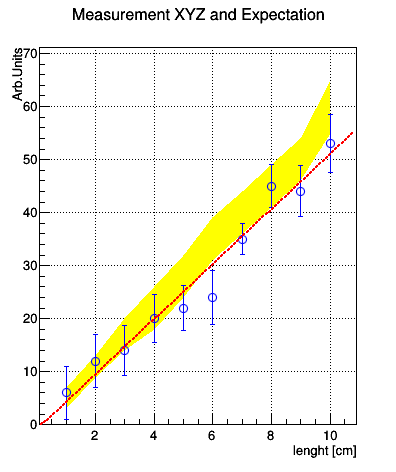

In [6]:
TCanvas * c = new TCanvas("c", "test", 400, 500);
c->SetGrid();
// E3 draws the band
graph_expected.DrawClone("E3AL"); 
graph->DrawClone("PESame");
c->Draw()

We add a legend to improve the clarity of the plot. It is always reccomended to make the plot "self descriptive".

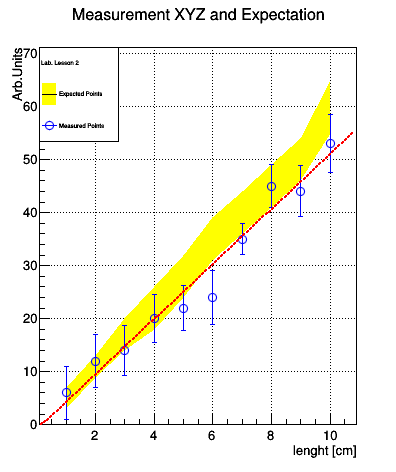

In [7]:
TLegend leg(.1,.7,.3,.9,"Lab. Lesson 2");
leg.SetFillColor(0);
leg.AddEntry(&graph_expected,"Expected Points");                                                                                          
leg.AddEntry(graph,"Measured Points");                                                                                                   
leg.DrawClone("Same");
c->Draw();